# Identifying gene difference content in closely related strains

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df_cr = pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\closely_related_matrix.csv")

In [3]:
df_cr

,Unnamed: 0,18942,1053,36653,35906,24887,40959,19451,16248,17887,...,29295,20565,22234,31939,40447,22779,40560,37248,6454,38985
0,18942,NaN,NaN,0.000044,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000036
1,1053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36653,0.000044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000037
3,35906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000158,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,40560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,37248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000211,...,NaN,NaN,NaN,NaN,0.000189,NaN,NaN,NaN,NaN,NaN
98,6454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000084,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_cr=df_cr.set_index('Unnamed: 0')

In [5]:
df_pa=pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\binary_matrix.csv")

In [6]:
df_pa=df_pa.set_index('Unnamed: 0')

For an exmaple, let's look at the difference in genes between strains 18942 and 36653.

In [7]:
df_pa['36653']

Unnamed: 0
0        1
1        1
2        1
3        1
4        1
        ..
29715    0
29716    0
29717    0
29718    0
29719    0
Name: 36653, Length: 29720, dtype: int64

In [8]:
df_pa['18942']

Unnamed: 0
0        1
1        1
2        1
3        1
4        1
        ..
29715    0
29716    0
29717    0
29718    0
29719    0
Name: 18942, Length: 29720, dtype: int64

In [9]:
diff=df_pa['36653']-df_pa['18942']
diff

Unnamed: 0
0        0
1        0
2        0
3        0
4        0
        ..
29715    0
29716    0
29717    0
29718    0
29719    0
Length: 29720, dtype: int64

In [10]:
gene_diff=diff.to_numpy().nonzero() 

These numbers represent the indecies at which our two strains differ. These indecies directly correlate to genes. Thus, we can see which genes the two strains differ by.

In [11]:
gene_diff=gene_diff[0]

In [12]:
len(gene_diff), gene_diff

(98,
 array([1886, 1939, 1969, 2080, 2083, 2093, 2120, 2161, 2165, 2177, 2216,
        2221, 2270, 2355, 2380, 2408, 2439, 2452, 2455, 2472, 2561, 2611,
        2613, 2643, 2677, 2695, 2696, 2728, 2743, 2772, 2785, 2833, 2894,
        2942, 2970, 2978, 2989, 2990, 3003, 3011, 3015, 3024, 3028, 3097,
        3119, 3120, 3122, 3136, 3149, 3151, 3154, 3157, 3158, 3193, 3203,
        3216, 3231, 3247, 3287, 3303, 3307, 3366, 3372, 3374, 3381, 3404,
        3408, 3414, 3432, 3447, 3451, 3453, 3464, 3472, 3527, 3547, 3603,
        3614, 3627, 3663, 3672, 3696, 3723, 3776, 3790, 3798, 3801, 3880,
        3899, 4177, 4509, 4525, 4898, 5004, 5320, 5384, 5416, 6318],
       dtype=int64))

From this, we can see that the two strains differ by 98 genes. We can continue this cycle for all the 100 strains.

In [13]:
if isinstance(df_cr.iloc[0,0],float)==True:
            diff=df_pa[str(df_cr.columns[0])]-df_pa[str(df_cr.index[0])]
            gene_diff=diff.to_numpy().nonzero()
            gene_diff=gene_diff[0]
            print(len(gene_diff))

0


In [15]:
gene_list=[] #list of all closely related strains with the genes that differ
gene_diff_list=[] #list of all closely related strains with number of genes that differ

In [16]:
for i in range(0,len(df_cr.columns)): #columns + len(df_cr.columns)
    for j in range(0,len(df_cr)): #rows+len(df_cr)
        if pd.isna(df_cr.iloc[j,i])==False: #if cell is not empty, then calculate gene diff between strains
            diff=df_pa[str(df_cr.columns[i])]-df_pa[str(df_cr.index[j])]
            gene_diff=diff.to_numpy().nonzero()
            gene_diff=gene_diff[0]
            gene_list.append({"Gene Difference":gene_diff, "Gene Difference Length":len(gene_diff),
                              "Strain 1":str(df_cr.columns[i]),"Strain 2":str(df_cr.index[j])})

In [17]:
gene_list=pd.DataFrame(gene_list) #dataframe with two strains that are closely related, the length of gene difference, and
# which genes differ

We have 756 pairs of strains that are closely related.

In [18]:
gene_diff_len=gene_list['Gene Difference Length']

Text(0, 0.5, 'Counts')

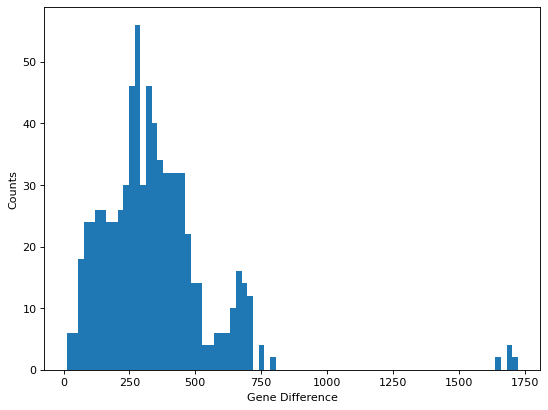

In [19]:
figure(figsize=(8, 6), dpi=80)
hist=plt.hist(gene_diff_len,bins=80)
plt.xlabel('Gene Difference')
plt.ylabel('Counts')
#plt.xlim(0,0.0015)

In [20]:
df_dist = pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\dist_matrix.csv")
df_dist = df_dist.set_index('Unnamed: 0')
df_dist=df_dist.rename(columns={"Unnamed: 0": "Strains"})

In [21]:
gene_list

,Gene Difference,Gene Difference Length,Strain 1,Strain 2
0,"[1886, 1939, 1969, 2080, 2083, 2093, 2120, 216...",98,18942,36653
1,"[1886, 1939, 2027, 2042, 2083, 2093, 2120, 216...",106,18942,31541
2,"[1939, 2080, 2083, 2093, 2120, 2165, 2177, 222...",109,18942,36962
3,"[1939, 1994, 2027, 2083, 2093, 2120, 2123, 216...",157,18942,15699
4,"[1939, 2080, 2083, 2093, 2120, 2154, 2162, 216...",154,18942,24898
...,...,...,...,...
751,"[1886, 2027, 2042, 2080, 2103, 2263, 2587, 259...",33,38985,31541
752,"[2103, 2232, 2274, 2411, 2477, 2489, 2587, 261...",36,38985,36962
753,"[1994, 2027, 2080, 2103, 2123, 2161, 2263, 231...",94,38985,15699
754,"[2103, 2154, 2162, 2238, 2245, 2472, 2532, 253...",87,38985,24898


In [22]:
dist_list=[]

In [23]:
for i in range(0,len(gene_list.index)):
    strain1=gene_list['Strain 1'].iloc[i]
    strain2=gene_list['Strain 2'].iloc[i]
    strain2=int(strain2)
    a=df_dist[strain1] #distances for all strains related to strain 1
    dist=a.loc[strain2] #dist btw strain 1 and strain 2
    dist_list.append({"Strain 1":strain1,"Strain 2":strain2, "Core Distance":dist})

In [24]:
dist_list=pd.DataFrame(dist_list) #dataframe with two strains that are closely related and dist between them

In [25]:
dist_list

,Strain 1,Strain 2,Core Distance
0,18942,36653,0.000044
1,18942,31541,0.000057
2,18942,36962,0.000063
3,18942,15699,0.000044
4,18942,24898,0.000050
...,...,...,...
751,38985,31541,0.000050
752,38985,36962,0.000056
753,38985,15699,0.000037
754,38985,24898,0.000040


In [26]:
gene_list

,Gene Difference,Gene Difference Length,Strain 1,Strain 2
0,"[1886, 1939, 1969, 2080, 2083, 2093, 2120, 216...",98,18942,36653
1,"[1886, 1939, 2027, 2042, 2083, 2093, 2120, 216...",106,18942,31541
2,"[1939, 2080, 2083, 2093, 2120, 2165, 2177, 222...",109,18942,36962
3,"[1939, 1994, 2027, 2083, 2093, 2120, 2123, 216...",157,18942,15699
4,"[1939, 2080, 2083, 2093, 2120, 2154, 2162, 216...",154,18942,24898
...,...,...,...,...
751,"[1886, 2027, 2042, 2080, 2103, 2263, 2587, 259...",33,38985,31541
752,"[2103, 2232, 2274, 2411, 2477, 2489, 2587, 261...",36,38985,36962
753,"[1994, 2027, 2080, 2103, 2123, 2161, 2263, 231...",94,38985,15699
754,"[2103, 2154, 2162, 2238, 2245, 2472, 2532, 253...",87,38985,24898


In [27]:
df_col_merged = pd.concat([dist_list, gene_list], axis=1) #merged both dataframe

In [28]:
df_col_merged

,Strain 1,Strain 2,Core Distance,Gene Difference,Gene Difference Length,Strain 1,Strain 2
0,18942,36653,0.000044,"[1886, 1939, 1969, 2080, 2083, 2093, 2120, 216...",98,18942,36653
1,18942,31541,0.000057,"[1886, 1939, 2027, 2042, 2083, 2093, 2120, 216...",106,18942,31541
2,18942,36962,0.000063,"[1939, 2080, 2083, 2093, 2120, 2165, 2177, 222...",109,18942,36962
3,18942,15699,0.000044,"[1939, 1994, 2027, 2083, 2093, 2120, 2123, 216...",157,18942,15699
4,18942,24898,0.000050,"[1939, 2080, 2083, 2093, 2120, 2154, 2162, 216...",154,18942,24898
...,...,...,...,...,...,...,...
751,38985,31541,0.000050,"[1886, 2027, 2042, 2080, 2103, 2263, 2587, 259...",33,38985,31541
752,38985,36962,0.000056,"[2103, 2232, 2274, 2411, 2477, 2489, 2587, 261...",36,38985,36962
753,38985,15699,0.000037,"[1994, 2027, 2080, 2103, 2123, 2161, 2263, 231...",94,38985,15699
754,38985,24898,0.000040,"[2103, 2154, 2162, 2238, 2245, 2472, 2532, 253...",87,38985,24898


In [29]:
df_col_merged = df_col_merged.loc[:,~df_col_merged.columns.duplicated()].copy() #removed duplicate columns

In [30]:
df_col_merged

,Strain 1,Strain 2,Core Distance,Gene Difference,Gene Difference Length
0,18942,36653,0.000044,"[1886, 1939, 1969, 2080, 2083, 2093, 2120, 216...",98
1,18942,31541,0.000057,"[1886, 1939, 2027, 2042, 2083, 2093, 2120, 216...",106
2,18942,36962,0.000063,"[1939, 2080, 2083, 2093, 2120, 2165, 2177, 222...",109
3,18942,15699,0.000044,"[1939, 1994, 2027, 2083, 2093, 2120, 2123, 216...",157
4,18942,24898,0.000050,"[1939, 2080, 2083, 2093, 2120, 2154, 2162, 216...",154
...,...,...,...,...,...
751,38985,31541,0.000050,"[1886, 2027, 2042, 2080, 2103, 2263, 2587, 259...",33
752,38985,36962,0.000056,"[2103, 2232, 2274, 2411, 2477, 2489, 2587, 261...",36
753,38985,15699,0.000037,"[1994, 2027, 2080, 2103, 2123, 2161, 2263, 231...",94
754,38985,24898,0.000040,"[2103, 2154, 2162, 2238, 2245, 2472, 2532, 253...",87


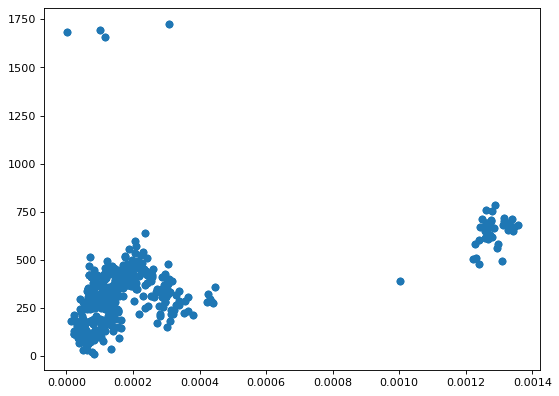

In [32]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df_col_merged['Core Distance'],df_col_merged['Gene Difference Length'])